/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch: 0, Loss: 2.1670, Time: 0.0186s
Epoch: 1, Loss: 0.4151, Time: 0.0154s
Epoch: 2, Loss: 0.2232, Time: 0.0152s
Epoch: 3, Loss: 0.2077, Time: 0.0152s
Epoch: 4, Loss: 0.2035, Time: 0.0168s
Epoch: 5, Loss: 0.2008, Time: 0.0153s
Epoch: 6, Loss: 0.1985, Time: 0.0169s
Epoch: 7, Loss: 0.1966, Time: 0.0182s
Epoch: 8, Loss: 0.1949, Time: 0.0212s
Epoch: 9, Loss: 0.1933, Time: 0.0195s
Epoch: 10, Loss: 0.1918, Time: 0.0185s
Epoch: 11, Loss: 0.1903, Time: 0.0267s
Epoch: 12, Loss: 0.1889, Time: 0.0466s
Epoch: 13, Loss: 0.1875, Time: 0.0376s
Epoch: 14, Loss: 0.1861, Time: 0.0195s
Epoch: 15, Loss: 0.1846, Time: 0.0185s
Epoch: 16, Loss: 0.1830, Time: 0.0169s
Epoch: 17, Loss: 0.1814, Time: 0.0166s
Epoch: 18, Loss: 0.1796, Time: 0.0171s
Epoch: 19, Loss: 0.1776, Time: 0.0173s
Epoch: 20, Loss: 0.1754, Time: 0.0194s
Epoch: 21, Loss: 0.1728, Time: 0.0212s
Epoch: 22, Loss: 0.1698, Time: 0.0225s
Epoch: 23, Loss: 0.1662, Time: 0.0242s
Epoch: 24, Loss: 0.1620, Time: 0.0187s
Epoch: 25, Loss: 0.1570, Time: 0.02

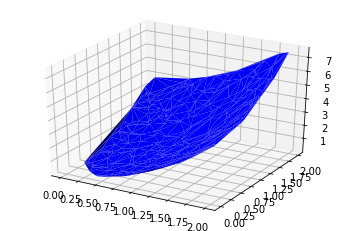

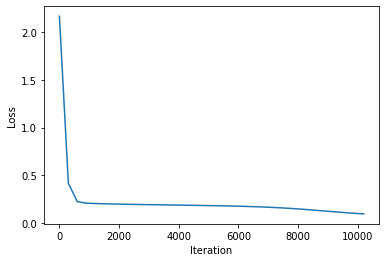

TEST RESULT
MAE 0.37:  MSE 0.20: 


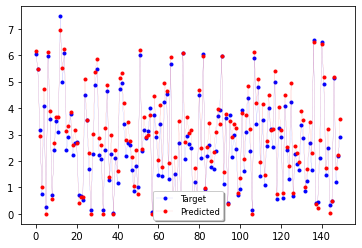

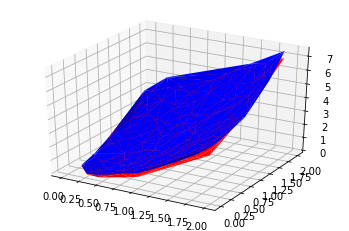

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

#Network Layers
hiddenLayerDim = 10
inputDim = 2
outputLayerDim = 1

#Train Parameters
learning_rate = 0.01
error_rate = 0.1

n_trainSample = 300
n_testSample = 150

#Error Functions
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)))

def mean_squared_error(y_true, y_pred):
    return (np.square(y_true - y_pred)).mean(axis=None)

#Activation Functions

#def sigmoid(x):
#    return 1.0/(1.0 + np.exp(-x)) 

def reLu(x):
    return x*(x>0)

def tanh_deriv(x):
    return  1 - np.tanh(x)**2

#Network Functions

def propagation(x, t,network):

    #network layers are separated for easy understanding
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
 
    # forward propagation
    A = np.dot(x,hiddenLayer) + hiddenBias
    Z = np.tanh(A)

    B = np.dot(Z,OutputLayer) + outputBias
    Y = reLu(B)
    #loss function
    loss = mean_squared_error(t,Y)

    # backward propagation
    Eout = Y - t
    Ehid = tanh_deriv(A) * np.dot(OutputLayer, Eout)
    dOut = np.outer(Z, Eout)
    dHid = np.outer(x, Ehid)
 
    #update weights
    grad = (dHid, dOut, Ehid, Eout)
    for j in range(len(network)):
        network[j] -= learning_rate * grad[j] 
                  
    return  loss

def initialize_network():
    
    hiddenLayer = np.random.normal(scale=0.1, size=(inputDim, hiddenLayerDim))
    outputLayer = np.random.normal(scale=0.1, size=(hiddenLayerDim, outputLayerDim))
    hiddenBias = np.zeros(hiddenLayerDim)
    outputBias = np.zeros(outputLayerDim)
    
    return [hiddenLayer,outputLayer,hiddenBias,outputBias]

def train(error_rate):
    
    hist_losses = list()
    mean_loss = float('inf')
    epoch = 0
    while (mean_loss > error_rate):
        
        #epoch
        err = list()  
        t0 = time.clock()      
        for iteration in range(len(X_train)): 
            loss= propagation(X_train[iteration], T[iteration], network)
            err.append( loss )
            
        mean_loss = np.mean( err )  #for each epoch
        print ("Epoch: %d, Loss: %.4f, Time: %.4fs" % ( epoch,mean_loss, time.clock()-t0 ) )   
        epoch +=1
        hist_losses.append(mean_loss)
    return hist_losses,epoch

def predict(x,network):
    
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
    
    A = np.dot(x,hiddenLayer) + hiddenBias
    B = np.dot(np.tanh(A),OutputLayer) + outputBias
    return reLu(B)


# Initialize the network
network = initialize_network()

#Train Data
random.seed(33)

x =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])
y =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])

T =  x**2 + y**2
X_train= [[x[i],y[i]] for i in range(len(x))]
X_train= np.array(X_train)
T = np.array(T)

# Train
hist_losses,epoch = train(error_rate)

#3D Train Data Graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, T, color='blue',linewidth=0.2, antialiased=True)
plt.show()


#iteration vs loss graph
x_axis = [i*n_trainSample for i in range(epoch)]
plt.figure()
plt.plot(x_axis,hist_losses,linestyle = '-')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Test Data
x = np.linspace(0, 2, n_testSample)
y = np.linspace(0, 2, n_testSample)
random.shuffle(x)
random.shuffle(y)
X_test = [[x[i],y[i]] for i in range(len(x))]

#prediction
pred= list()
for i in range(len(X_test)):
    pred.append(predict(X_test[i], network))

Z1 = (x ** 2 + y ** 2).reshape(n_testSample)  #target
Z2 = (np.array(pred)).reshape(n_testSample)   #predicted

print('TEST RESULT\n'
      'MAE %.2f: '%mean_absolute_error(Z1,Z2),
      'MSE %.2f: '%mean_squared_error(Z1,Z2),
      )

#prediction of Z values graph
x_axis = [i for i in range(n_testSample)]
plt.figure()
plt.plot(x_axis,Z1,linestyle = 'dashed',color='blue',
         marker = '.',label='Target',linewidth = '0.1')
plt.plot(x_axis,pred,linestyle = 'dashed',color='red',
         marker = '.',label='Predicted',linewidth = '0.1')
legend = plt.legend(loc='lower center', shadow=True, fontsize='small')
plt.show()

#3d target vs predicted graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, Z1, color='blue',linewidth=0.2, antialiased=True,label='Target')
ax.plot_trisurf(x, y, Z2, color='red',linewidth=0.2, antialiased=True,label='Predicted')
plt.show()